In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import scale

In [3]:
df = pd.read_csv('E:/data/data science/data course/DATASET/spine.csv')

In [5]:
# PCA
X=df.iloc[:,0:6]
X=scale(X)
pca=PCA()
pca.fit(X)

PCA()

In [10]:
W=pca.components_.T
pd.DataFrame(W[:,:3],index=df.columns[:-1],columns=['PC1','PC2','PC3'])

,PC1,PC2,PC3
PI,0.535142,-0.002194,-0.096069
PT,0.323585,0.527545,-0.648701
LL,0.457970,0.092875,0.152338
SS,0.445906,-0.396157,0.360313
PR,-0.143497,0.727756,0.585991
GS,0.423978,0.162777,0.271184


The first PC(PC1) gives a contrast between the average of PI, PT, LL, SS and GS against PR. The second PC (PC2) gives a contrast between the average of PR, GS, PT, LL against PI and SS. PC3 provides a contrast between the average of PI and PT against the average of LL, SS, PR and GS.

In [15]:
pd.DataFrame(W[:,3:6],index=df.columns[:-1],columns=['PC4','PC5','PC6'])

,PC4,PC5,PC6
PI,-0.102799,-0.423458,7.172898e-01
PT,-0.006441,-0.150562,-4.164920e-01
LL,-0.548100,0.676770,-1.456789e-11
SS,-0.127201,-0.431500,-5.585962e-01
PR,-0.174213,-0.275763,-3.446637e-12
GS,0.801528,0.278852,8.303502e-12


The  PC4 gives a contrast between the average of PI, PT, LL, SS and GS against PR. The PC5 gives a contrast between the average of PR, PI, SS, PT against LL and GS. PC6 provides a contrast between the average of PI and GS against the average of LL, SS, PR and PT

In [16]:
pd.DataFrame(pca.explained_variance_ratio_.cumsum(),index=np.arange(X.shape[1])+1,columns=['Explained Variability'])

,Explained Variability
1,0.540964
2,0.740061
3,0.866909
4,0.945664
5,1.000000
6,1.000000


Obviously, the first two components explain about 74% of the variability. So, we can work with these two components.

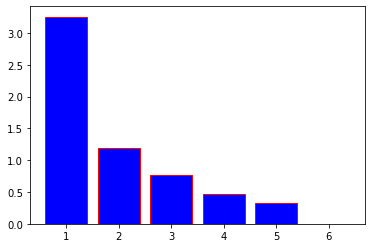

In [18]:
plt.bar(np.arange(1,X.shape[1]+1),pca.explained_variance_,color="blue",edgecolor="Red");

There is an elbow on the second component, so we can choose the first two components.

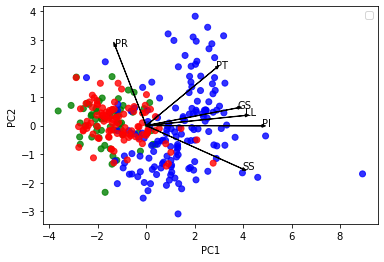

In [45]:
y = pca.fit_transform(X)
color_list = ['green' if i == 'Hernia' else 'red' if i == 'Normal' else "blue" for i in df.loc[:, 'Categories']]
fig, ax = plt.subplots()
ax.scatter(y[:, 0], y[:, 1], c=color_list, marker='o', label=['Hernia', 'Normal', 'Spondylolisthesis'], alpha=0.8)
ax.legend(recs, ['Hernia', 'Normal', 'Spondylolisthesis'])
plt.xlabel('PC1')
plt.ylabel('PC2')

Z = pd.DataFrame(columns=['PI', 'PT', 'LL', 'SS', 'PR', 'GS', 'Categories'])
xs0 = y[:, 0]
ys1 = y[:, 1]
for i in range(len(W[:, 0])):
    plt.arrow(np.mean(xs0), np.mean(ys1), W[i, 0]*abs(max(xs0)), W[i, 1]*abs(max(ys1)),
              color='black', width=0.01, head_width=0.1)
    plt.text(W[i, 0]*abs(max(xs0))+np.mean(xs0), +np.mean(ys1)+W[i, 1]*abs(max(ys1)),
             list(Z.columns.values)[i], color='black')


The points on the right side down the plot have large positive PC score1 and negative PC score 2. This says variables SS, PI, LL, GS, and PT are larger than their average compared to the rest of observations for these points. On the vertical axis, these points might have larger than average SS values or very smaller than average PR.
There is one unusual observation which is a possible outlier.

In [28]:
np.where(y[:,0]>7)


(array([115], dtype=int64),)

Based on the biplot, we can say the responsible factor might be extremely large values on SS, PI, LL and GS. This point might have a small value on PR as well.
Let’s take a look at this observation:

In [29]:
df.iloc[115,]

PI                      129.834
PT                      8.40448
LL                      48.3841
SS                       121.43
PR                       107.69
GS                      418.543
Categories    Spondylolisthesis
Name: 115, dtype: object

Compare it to the maximum values of the variables:

In [30]:
df.agg('max')

PI                      129.834
PT                      49.4319
LL                      125.742
SS                       121.43
PR                      163.071
GS                      418.543
Categories    Spondylolisthesis
dtype: object

The comparison shows that this observation takes the maximum values on three variables including PI, SS and GS, and that’s why it is located far from the cloud of data.